In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
import matplotlib.pyplot as plt


In [2]:
books=pd.read_csv("C:/Users/maayubi/Downloads/book.csv",encoding='latin1')

In [3]:
books.head(10)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
#books.drop(books.iloc[:,0:1],axis=1)

In [6]:
books=books.rename({"Unnamed: 0":"s.no.","User.ID":"userid","Book.Title":"book_title","Book.Rating":"book_rating"},axis=1)

In [7]:
len(books.userid.unique())

2182

In [8]:
len(books.book_title.unique())

9659

In [9]:
len(books.book_rating.unique())

10

In [10]:
#books1=books.drop_duplicates(['book_title'])

In [11]:
#books2=books.drop_duplicates(['userid'])

In [12]:
books1=books.drop(['s.no.'],axis=1)
books1

,userid,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [13]:
books2=books1.sort_values('userid').reset_index(drop=True)
books2.head()

,userid,book_title,book_rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7


In [14]:
user_books=books2.pivot_table(index='userid',columns='book_title',values='book_rating')

In [15]:
#df_b4=df_b3.pivot_table(index="UID",columns='Book_Name',values='Rating')
#df_b4.head()

In [16]:
user_books

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [17]:
user_books_filtered=user_books.fillna(0)
user_books_filtered

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [18]:
user_books_sim=1-pairwise_distances(user_books_filtered.values,metric='cosine')

In [19]:
user_books_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
user_sim_df=pd.DataFrame(user_books_sim)

In [21]:
user_sim_df.index=books1.userid.unique()
user_sim_df.columns=books1.userid.unique()
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
user_sim_df.iloc[20:40,20:40]

,276798,276800,276804,276808,276811,276812,276813,276814,276820,276822,276827,276828,276830,276832,276835,276837,276842,276847,276848,276850
276798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276804,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276808,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276811,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276813,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
np.fill_diagonal(user_books_sim,0)
user_sim_df.iloc[0:10,0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
user_sim_df.idxmax(axis=1)[200:220]

277427    276726
277432    276726
277433    276726
277435        81
277436    276726
277439    276726
277444    276726
277457    276726
277462    276726
277466    161436
277469    276726
277470    276726
277471    276726
277473    276726
277474    276726
277478    276726
277479    276726
277486    276726
277489    276726
277502    276726
dtype: int64

In [26]:
#there is simimlarity between userid 276939 , 276726
books2[(books2['userid']==276726)| (books2['userid']==162121)]

,userid,book_title,book_rating
7591,162121,Cannibal In Manhattan,9
7592,162121,American Fried: Adventures of a Happy Eater.,7
7593,162121,I Should Have Stayed Home: The Worst Trips of ...,8
7594,162121,Twilight,8
7595,162121,The Evolution of Jane,8
7596,162121,Open Water,5
7597,162121,The Cloister Walk,7
7598,162121,AT PARADISE GATE,8
7599,162121,How to Flirt: A Practical Guide,7
7601,276726,Classical Mythology,5


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='book_rating', ylabel='Count'>

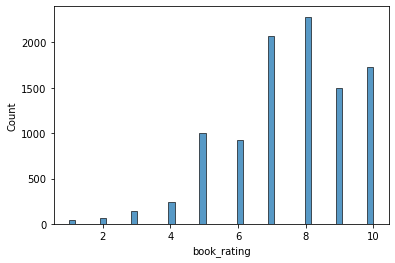

In [28]:
sns.histplot(books1['book_rating'])

In [29]:
books2.value_counts(books2['book_rating']>9)

book_rating
False    8268
True     1732
dtype: int64

In [30]:
#books1.(book_title|books1['book_rating']>9)
#books2[books2['book_title'] and (books2['book_rating']>9)]

In [31]:
user1= books2[books2['userid']==162121]
user2= books2[books2['userid']==276726]

In [32]:
user1

,userid,book_title,book_rating
7591,162121,Cannibal In Manhattan,9
7592,162121,American Fried: Adventures of a Happy Eater.,7
7593,162121,I Should Have Stayed Home: The Worst Trips of ...,8
7594,162121,Twilight,8
7595,162121,The Evolution of Jane,8
7596,162121,Open Water,5
7597,162121,The Cloister Walk,7
7598,162121,AT PARADISE GATE,8
7599,162121,How to Flirt: A Practical Guide,7


In [33]:
user2

,userid,book_title,book_rating
7601,276726,Classical Mythology,5


In [34]:
#here find Cosine Similarity which is greater than 0.5
print("UserID : Cosine Pairwise Disance : UserID")
for i in user_sim_df.index:
    if user_sim_df.loc[i].max()>0.5:
        print(i, ":",user_sim_df.loc[i].max(),":",)

UserID : Cosine Pairwise Disance : UserID
276820 : 0.7071067811865476 :
277351 : 1.0 :
277353 : 1.0 :
277601 : 1.0 :
277945 : 1.0 :
277958 : 0.7525766947068778 :
278160 : 1.0 :
278620 : 1.0 :
92 : 1.0 :
367 : 1.0 :
1368 : 0.5499719409228703 :
1775 : 1.0 :
1782 : 1.0 :
2203 : 1.0 :
2883 : 1.0 :
3293 : 1.0 :
3350 : 1.0 :
3462 : 0.7071067811865476 :
3473 : 0.6689647316224497 :
3506 : 0.5025707110324167 :
3538 : 1.0 :
3619 : 1.0 :
3896 : 0.5025707110324167 :
3910 : 0.6622661785325219 :
3944 : 1.0 :
4203 : 0.5153253011206647 :
4226 : 0.5499719409228703 :
4228 : 0.5153253011206647 :
161232 : 0.6139406135149205 :
161343 : 1.0 :
161361 : 1.0 :
161390 : 1.0 :
161443 : 0.6139406135149205 :
161458 : 1.0 :
161480 : 0.6622661785325219 :
161951 : 0.6689647316224497 :


R276820=user_sim_df[(user_sim_df[276820]>0.5)]
for i in R276820:
    if R276820.loc[i]:
        print(i)

In [35]:
#recommended list
recommend=books1[(books1['userid']==277351)| (books1['userid']==3350)]
recommend

,userid,book_title,book_rating
632,277351,You Be the Jury #02,5
633,277351,Comic Characters,5
634,277351,The Time Machine (Troll Illustrated Classics),7
635,277351,I Like School (in My World Series),6
6465,3350,Age of War (Super Bolan #90),6
6466,3350,"Destination Unknown (Remnants, 2)",8
6467,3350,"The Mayflower Project (Remnants, No 1)",8
6468,3350,"Them (Remnants, 3)",7
6469,3350,The Secret of Terror Castle (Three Investigato...,10


for i in user_sim_df.columns:
    if user_sim_df[loc[i]>0.5]:
        print(i,)

In [36]:
#user_sim_df.sort_values([277353],ascending=False).head()